In [80]:
import os
import pandas as pd
import numpy as np
class datasets:
    def __init__(self):
        pass
    @staticmethod
    def load(location, action, humanId, distance)->dict:
        fileNames = os.listdir('./data/{}'.format(location))
        fileSelect = set(fileNames)
        conditions = [action, humanId, distance]
        for condition in conditions:
            if condition != 'all':
                if isinstance(condition, str):
                    fileSelect &= set(i for i in fileNames if condition in i)
                elif isinstance(condition, list):
                    tmp = set()
                    for c in condition:    
                        tmp |= set(i for i in fileNames if c in i)
                    fileSelect &= tmp
                    
        dic = {}
        for f in fileSelect:
            path = './data/{}/{}'.format(location, f)
            dic['{}_{}'.format(location, f)] = pd.read_csv(path)
        return dic
    def preprocess(data:dict, winSize = 96, useAlgorithm = False):
        # useAlgorithm = False, 则返回标记好的结果，否则使用切分算法重新切分
        dic = {}
        for key in data.keys():
            dic[key] = []
            location = key.split('_')[0]
            path = './data/{}_txt/{}.txt'.format(location, key[len(location)+1:-4])
            try:
                txt = np.loadtxt(path)
                for i in txt:
                    mid = int(np.mean(i))
                    left, right = mid - winSize//2, mid + winSize//2
                    dic[key].append(data[key].iloc[left: right, :])
            except:
                pass
        return dic
#     def splitAlgorithm(data, algorithm = 'cos_sim')

<ipython-input-103-13d10eb5be1a>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


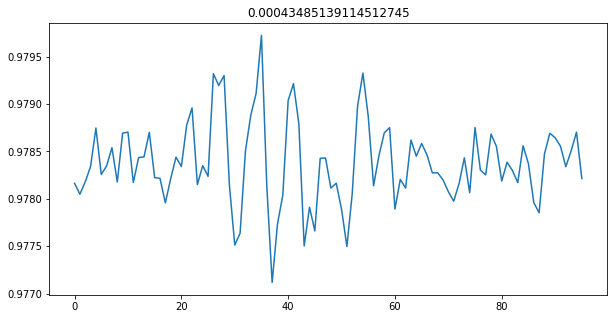

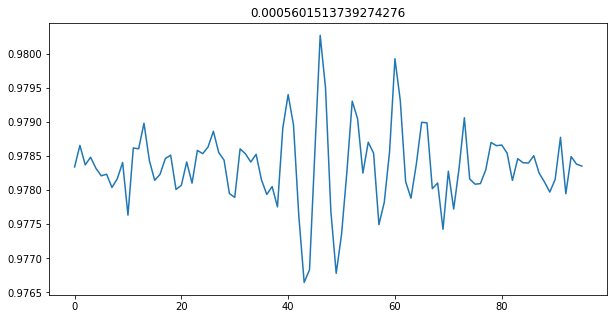

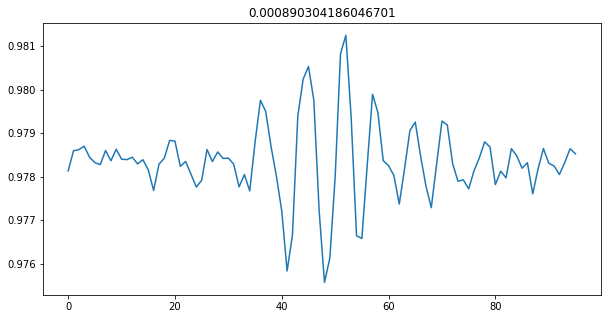

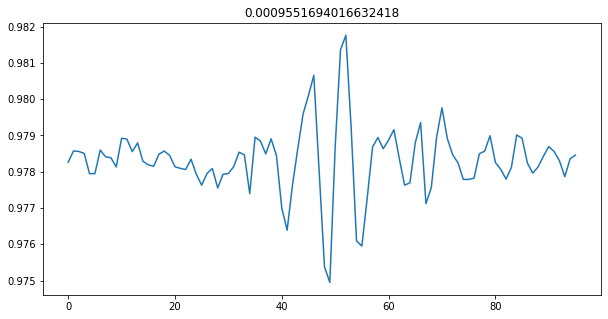

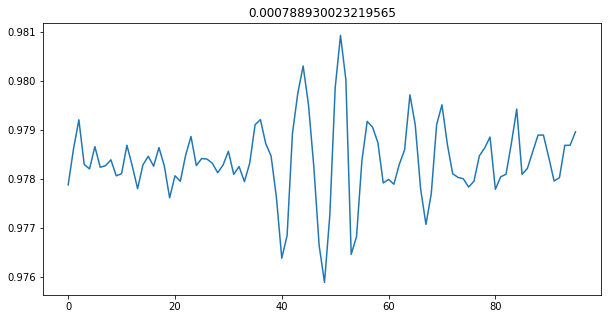

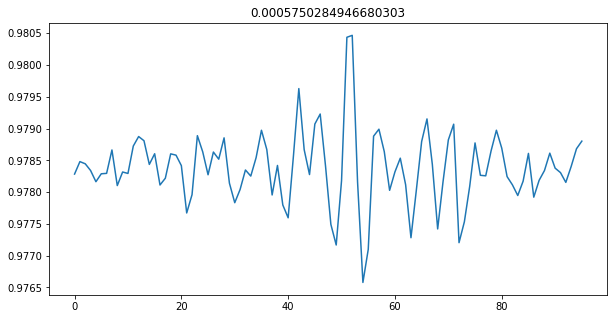

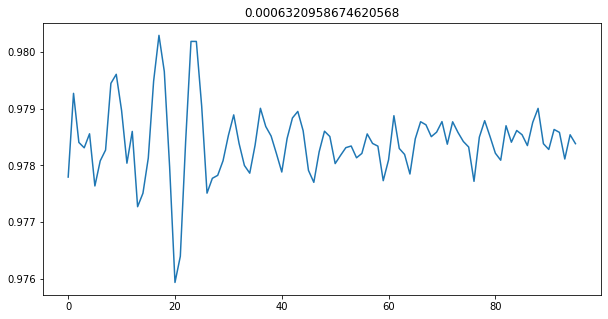

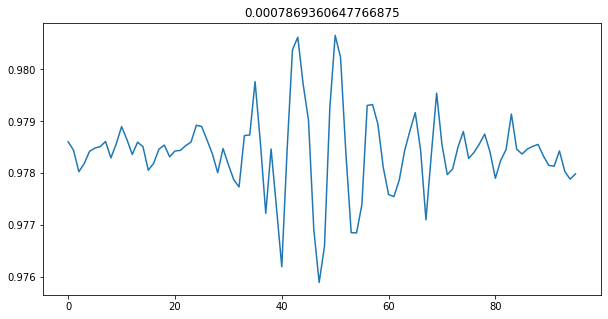

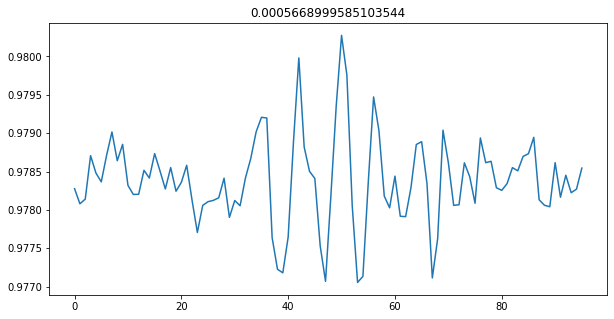

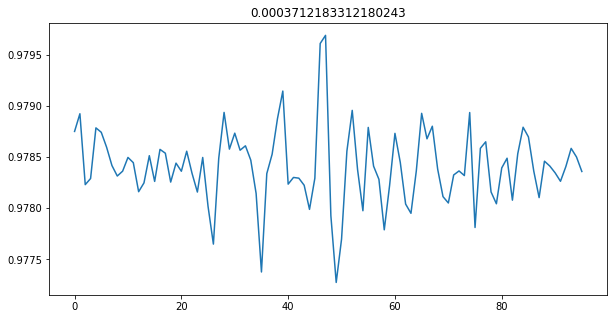

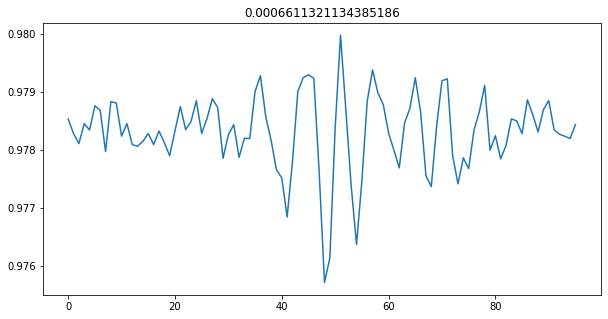

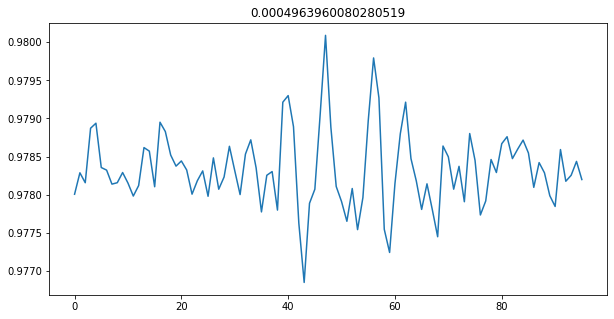

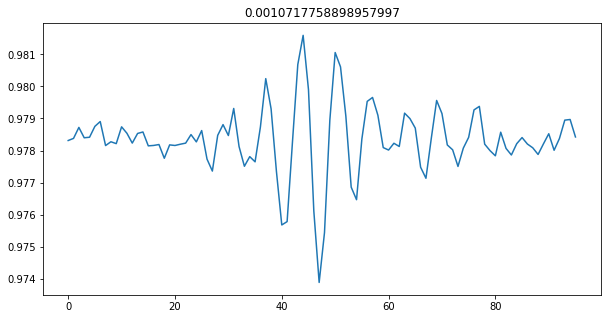

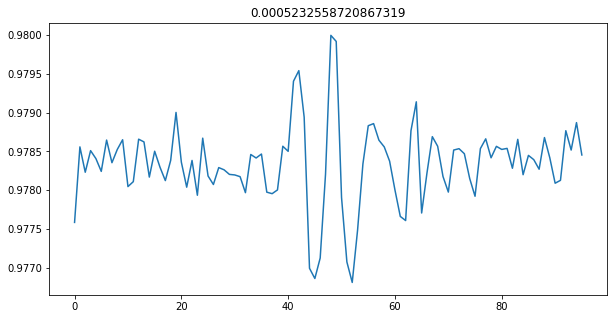

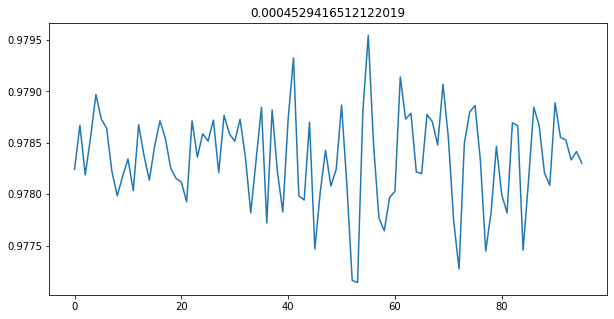

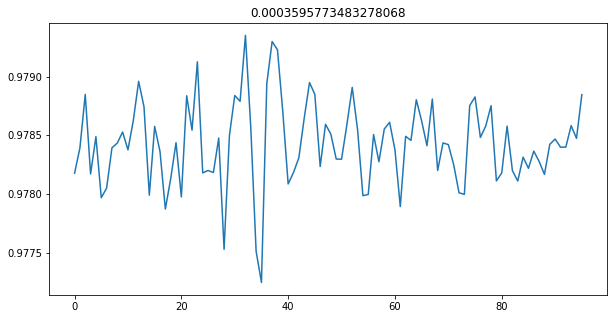

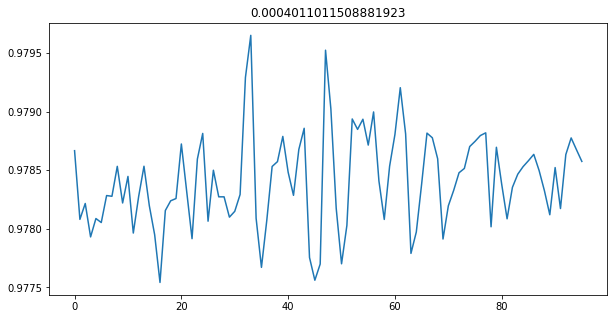

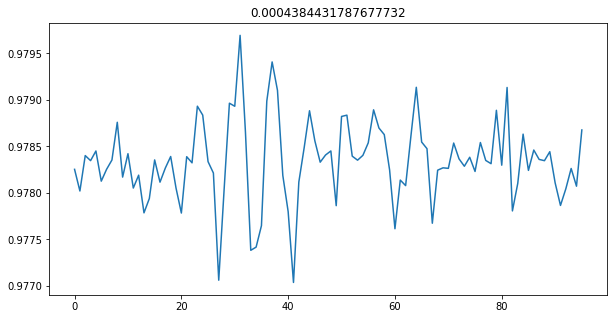

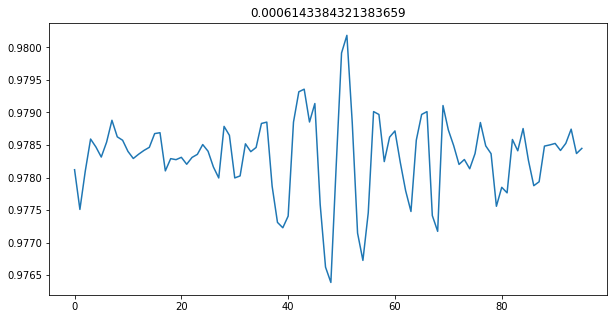

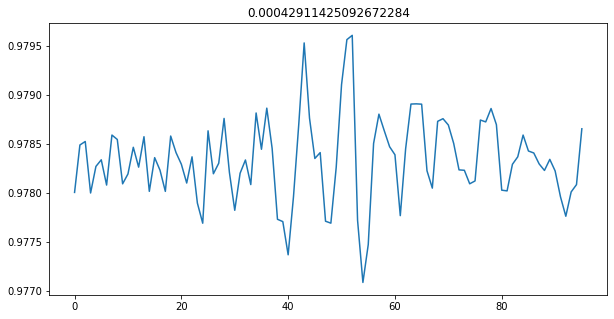

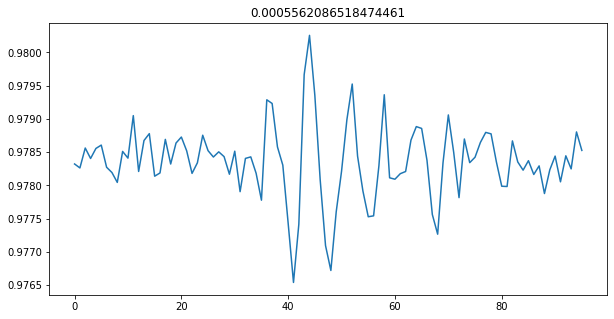

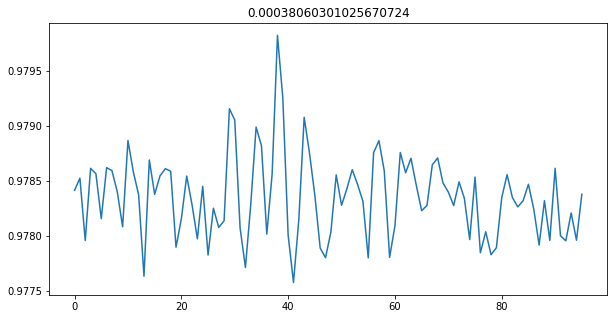

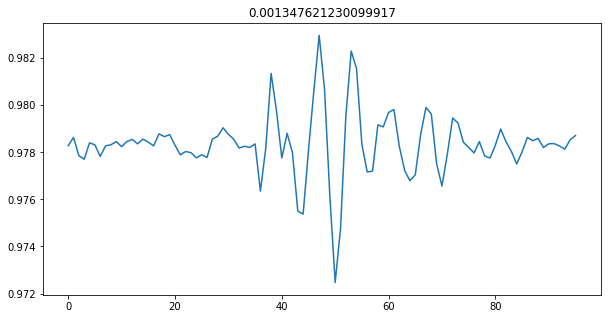

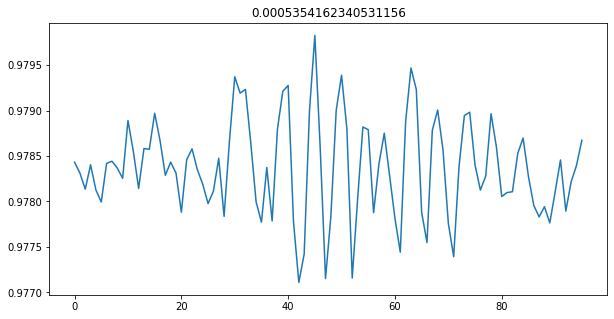

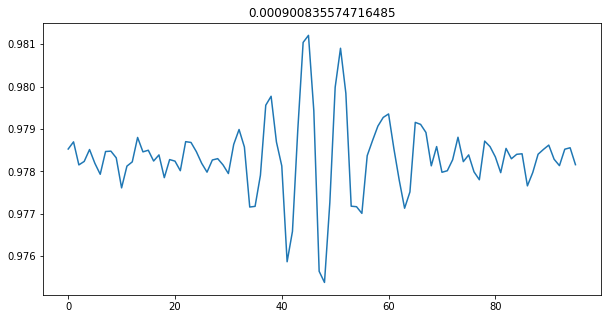

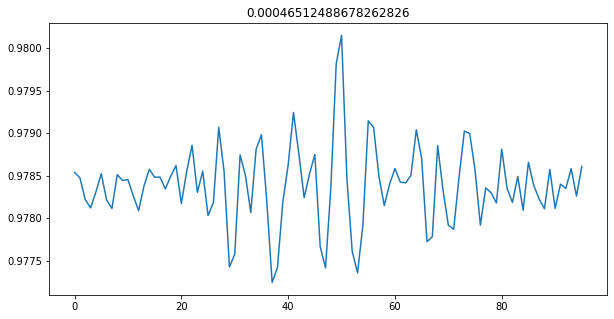

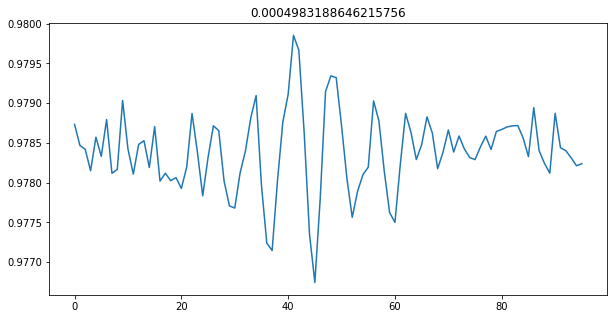

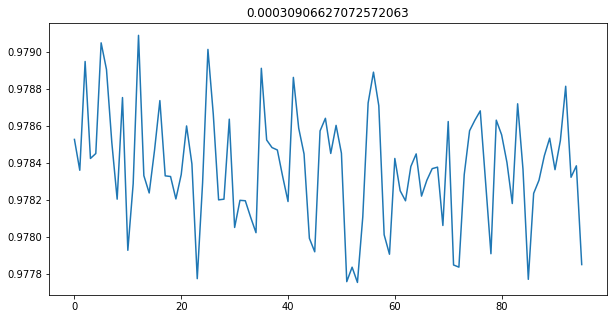

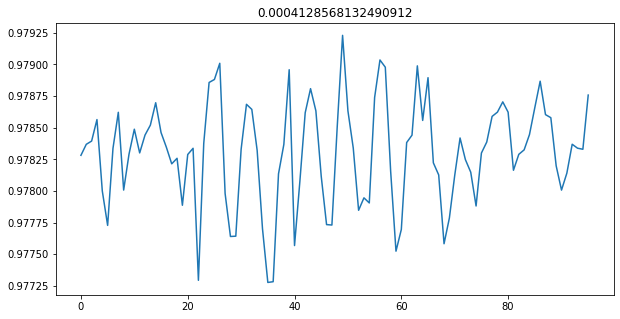

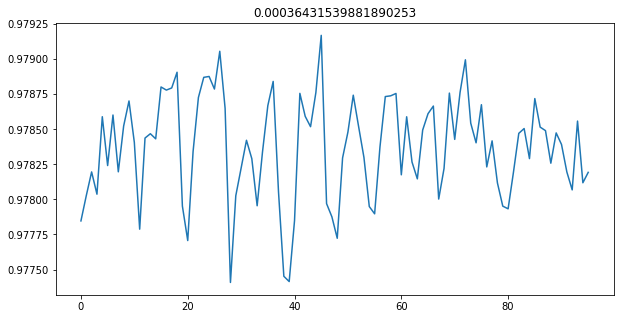

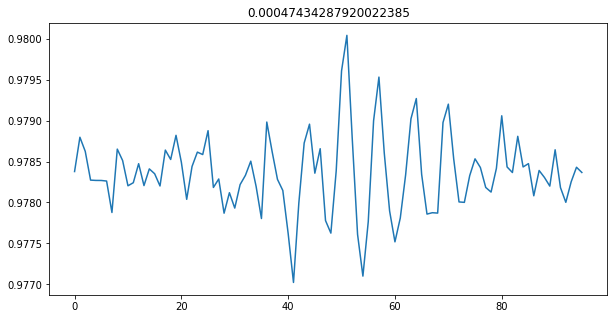

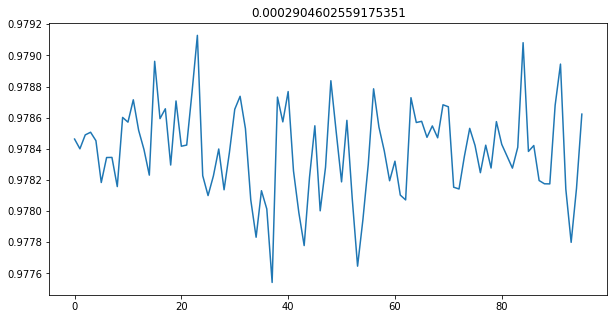

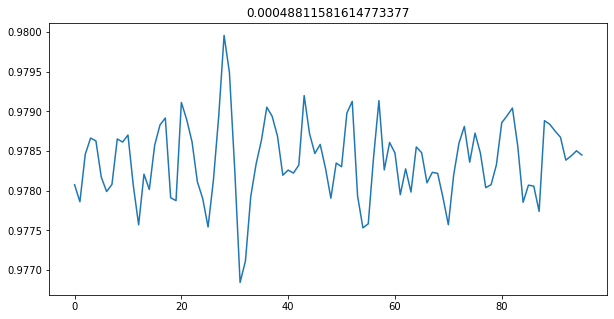

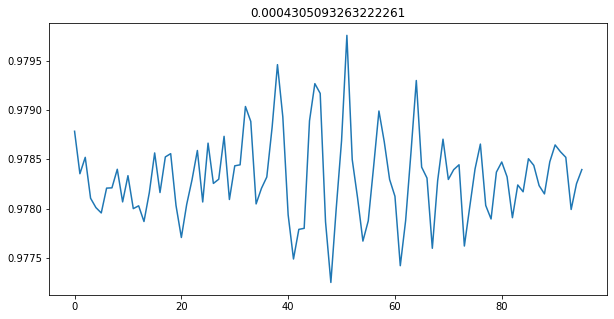

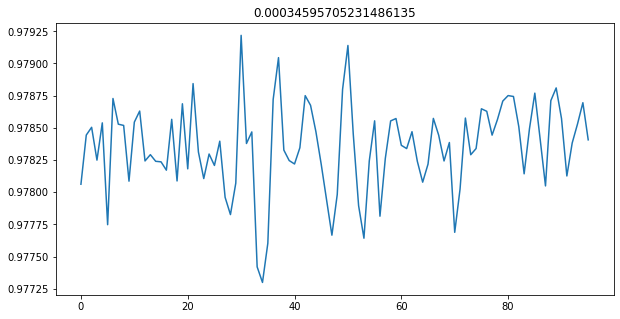

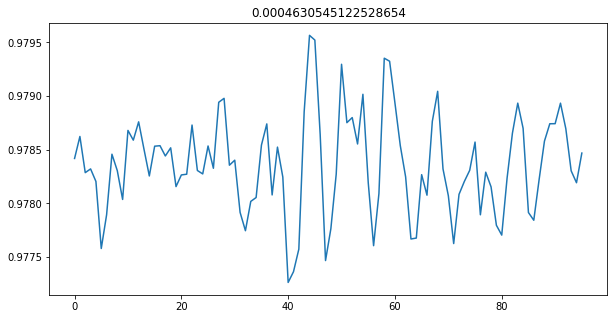

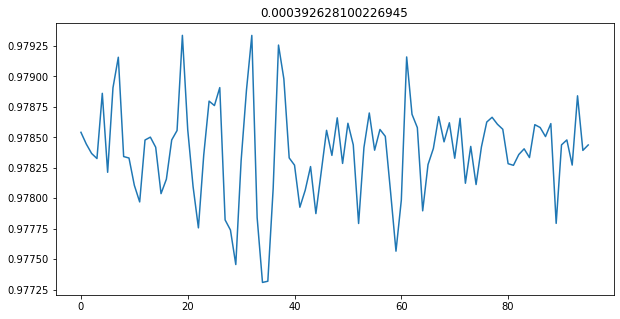

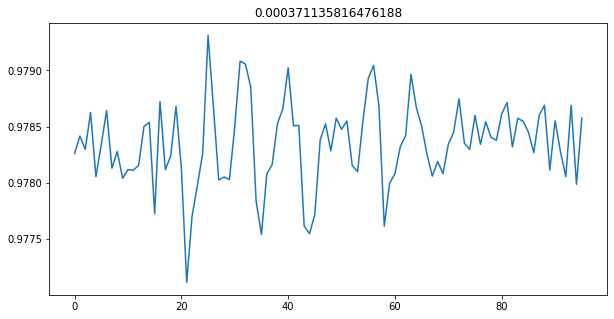

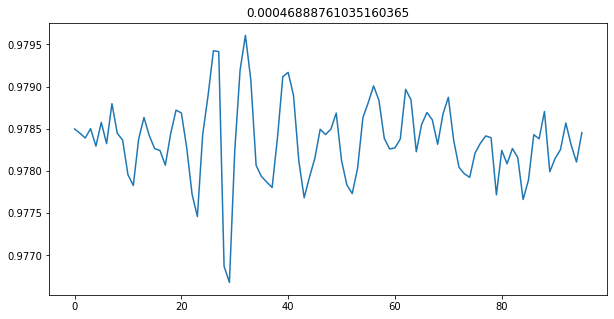

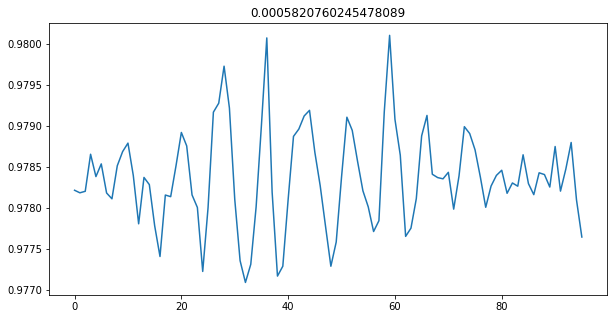

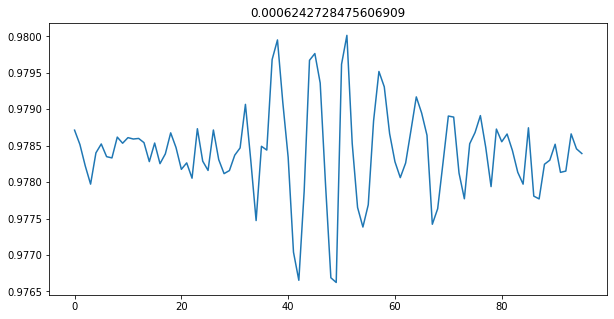

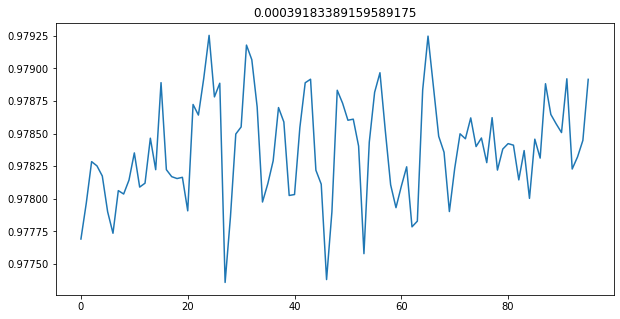

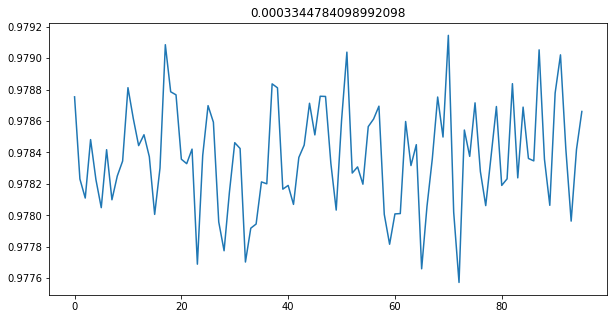

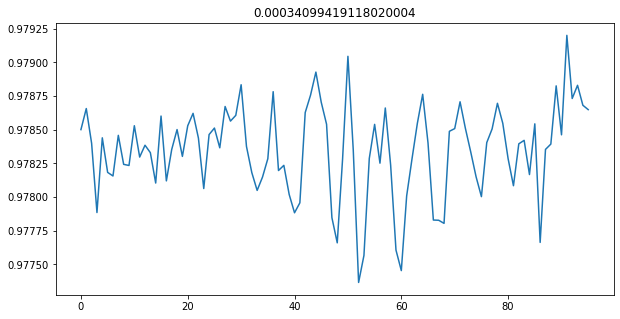

In [103]:
# num = 0
# for i in y:
#     plt.figure(figsize=(10,5))
#     if time_feats.std(i) <0.003:
#         num+=1
#     plt.title(time_feats.std(i))
#     plt.plot(i)